# Hello World of a Neural Network in PyTorch

This notebook contains a simple linear regression example of a neural networks with PyTorch.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
import time as t

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

Running on: cuda


## Create training data
The data comes from $f(x) =  mx + b + \epsilon$ where $ m = 2$ and $b = -1$

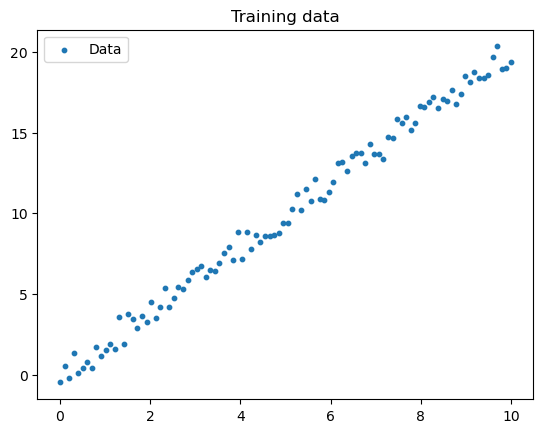

In [2]:
# 1. Generate some synthetic data
n = 100
x = torch.linspace(0,10,n)
m = 2
b = -1 
y = x*m + b + torch.rand(x.shape)*2

plt.scatter(x, y, s=10, label='Data')
plt.title("Training data")
plt.legend()
plt.show()

# Our model is a single neuron
![](./imgs/neuron.png)

In [3]:
## 2. Create a model of a single neuron. By default the parameters of that model are initialized randomly.
# Models are created by classes that inherit from Module
class SingleNeuronModel(nn.Module):
    # On the init function we define our model (which layers are we going to use)
    def __init__(self):
        super().__init__() # Constructor of parent class
        self.single_neuron =  nn.Linear(1, 1)
        nn.init.normal_(self.single_neuron.weight, mean=0, std=1)


    # On the foreward model we indicate how to make one 'pass' of the model
    def forward(self, x):
        return self.single_neuron(x)
    

## Instantiate our model inside the GPU 
Also send the training examples to the GPU

Total number of parameters:  2
Named parameters: [('single_neuron.weight', Parameter containing:
tensor([[-0.0356]], device='cuda:0', requires_grad=True)), ('single_neuron.bias', Parameter containing:
tensor([0.4110], device='cuda:0', requires_grad=True))]


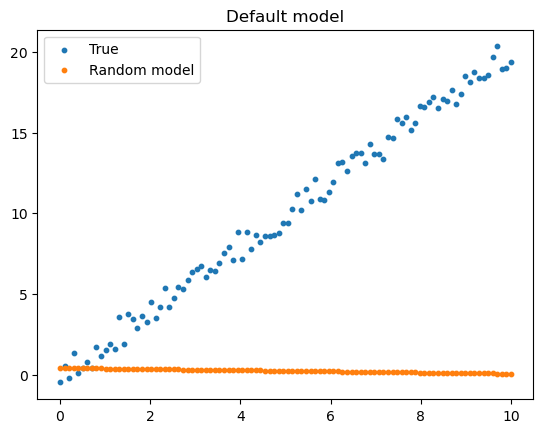

In [4]:
start_model = SingleNeuronModel().to(device)  # Instantiate inside GPU

# Send data to GPU and reshape to (batch size, input_size)
X = torch.reshape(x, (x.shape[0],1)).to(device)  
Y = torch.reshape(y, (y.shape[0],1)).to(device)

print("Total number of parameters: ", sum(p.numel() for p in start_model.parameters() if p.requires_grad))
print("Named parameters:", list(start_model.named_parameters()))

##-------------- Just for plotting --------------
fig, ax = plt.subplots(1,1)
def plotCurrentModel(x, y, model, ax):
    # Torch receives inputs with shape [Examples, input_size]
    model_y = model(X).cpu().detach().numpy()

    ax.scatter(x, y, s=10, label='True')
    p = ax.scatter(x, model_y, s=10, label='Random model')
    ax.set_title('Default model')
    ax.legend()
    return p

plotCurrentModel(x, y, start_model, ax)
plt.show()

## Perform training
### Define loss function as $MSE = \frac{1}{n} \sum_i^n (NN(x_i) - y_i)^2$
### Define optimization method as Stochastic Gradient Descent (SGD)
SGD updates the model parameters based on the gradient of a randomly selected subset (or mini-batch) of the training dataset (rather than the entire training dataset)

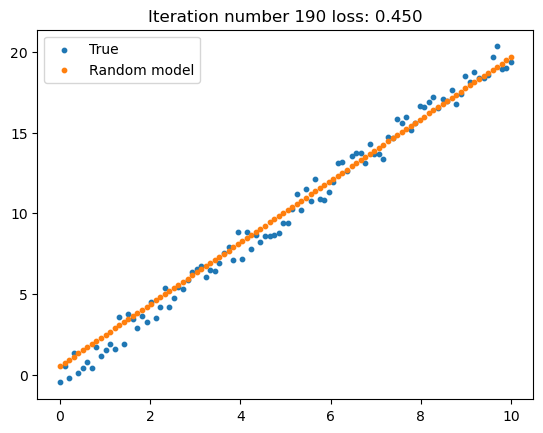

In [33]:
## 3.Optimize the parameters of the model using backpropagation
import copy


ex_model = copy.deepcopy(start_model)

loss_mse = nn.MSELoss() # Define loss function
optimizer = torch.optim.SGD(ex_model.parameters(), lr=2e-3) # Define optimization algorithm
epochs = 200 

ex_model.train()

for i in range(epochs): 
    # A (basic) training step in PyTorch consists of four basic parts:
    # 1.   Set all the gradients to zero using `opt.zero_grad()`
    # 2.   Calculate the loss, `loss`
    # 3.   Calculate the gradients with respect to the loss using `loss.backward()`
    # 4.   Update the parameters being optimized using `opt.step()`
    optimizer.zero_grad()
    pred = ex_model(X)
    loss = loss_mse(pred, Y)
    # Backpropagation
    loss.backward()
    optimizer.step()

    # ---------- Just for plotting ---------
    if i % 10 == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots(1,1)
        title = f"Iteration number {i} loss: {loss:0.3f}"
        print(title, end='\r')
        plotCurrentModel(x, y, ex_model, ax)
        ax.set_title(title)
        # display.display(plt.gcf())
        plt.show()
